In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("F:\\DataScience\\Problems\\LoanPrediction\\train.csv")
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
pd.crosstab((df['Education'] == 'Graduate'), df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Education,,,
False,52,82,134
True,140,340,480
All,192,422,614


In [7]:
pd.crosstab((df['Gender'] == 'Male'), df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Gender,,,
False,42,83,125
True,150,339,489
All,192,422,614


In [8]:
pd.crosstab((df['Credit_History'] == 1), df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
False,95,44,139
True,97,378,475
All,192,422,614


In [9]:
pd.crosstab((df['Married'] == 'Yes'), df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Married,,,
False,79,137,216
True,113,285,398
All,192,422,614


In [11]:
pd.crosstab((df['Dependents'] == '0'), df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Dependents,,,
False,85,184,269
True,107,238,345
All,192,422,614


In [12]:
pd.crosstab((df['Self_Employed'] == 'Yes'), df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
False,166,366,532
True,26,56,82
All,192,422,614


In [13]:
pd.crosstab((df['Property_Area'] == 'Urban'), df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Property_Area,,,
False,123,289,412
True,69,133,202
All,192,422,614


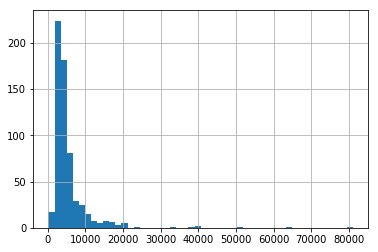

In [14]:
df['ApplicantIncome'].hist(bins=50)

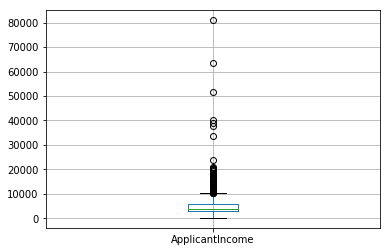

In [15]:
df.boxplot(column='ApplicantIncome')

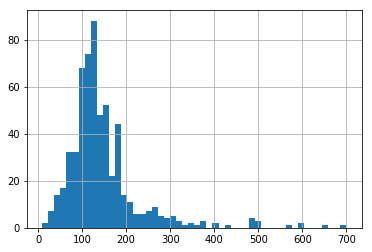

In [16]:
df['LoanAmount'].hist(bins=50)

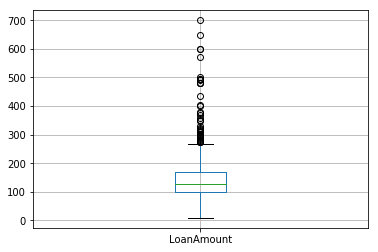

In [17]:
df.boxplot(column='LoanAmount')

In [18]:
temp1 = df['Credit_History'].value_counts(ascending=True)

#creation of pivot tables using python
#the probability of getting loan as per the credit history
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\n\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

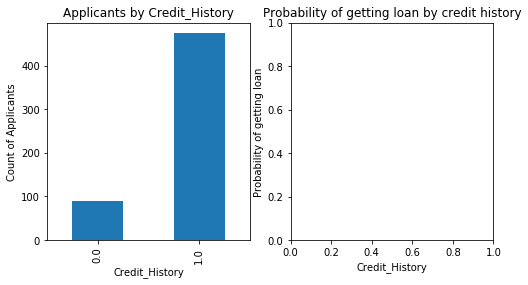

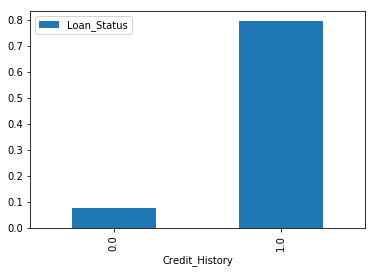

In [19]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

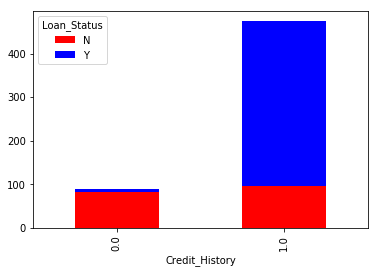

In [20]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [21]:
#Calculating missing values in each column

df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
#Filling the missing values of Loan_Amount by mean 

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
 df['Self_Employed'].fillna('No',inplace=True)

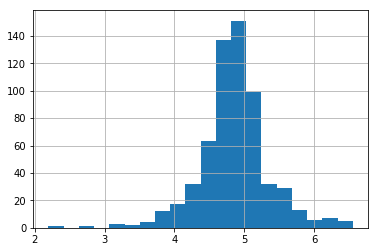

In [24]:
#log function to reduce the extreme values in Loan amount

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

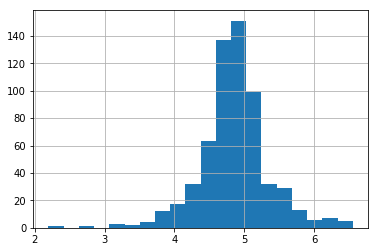

In [25]:
#Combining both ApplicantIncome & CoapplicantIncome and take a log transformation

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [26]:
#capacity of each applicant of how well he/she is suited to pay back his loan

df['Capacity%'] = ((df['LoanAmount'] / df['TotalIncome']) *100).astype(float)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872,2.777489
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569,2.468174
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750,2.851986
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305,3.036876
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819,1.465832


In [27]:
#males are around ~81%, so we'll fill the missing values with "male"
df.Gender = df.Gender.fillna('Male')

In [28]:
#Among the applicants there are ~65% of married persons. So, filling the missing values with yes
df.Married = df.Married.fillna('Yes')

In [29]:
#Assuming that most of the applicants having a Credit_History, therefore filling the missing values with 1.0

df.Credit_History = df.Credit_History.fillna('1.0')

In [30]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
Capacity%            False
dtype: bool

In [31]:
df.Dependents = df.Dependents.fillna('0')

In [32]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
Capacity%            False
dtype: bool

In [33]:
#building predictive model 
#we will use scikit-learn (sklearn), for which we need to convert the categorical values into numerical values

from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Capacity%            float64
dtype: object

In [46]:
def get_combined_data():
    train = pd.read_csv('F:\\DataScience\\Problems\\LoanPrediction\\train.csv')
    test = pd.read_csv('F:\\DataScience\\Problems\\LoanPrediction\\test.csv')
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined



In [47]:
combined = get_combined_data()
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [48]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [49]:
def impute_gender():
    global combined
    combined['Gender'].fillna('Male', inplace=True)

def impute_martial_status():
    global combined
    combined['Married'].fillna('Yes', inplace=True)

def impute_employment():
    global combined
    combined['Self_Employed'].fillna('No', inplace=True)

def impute_loan_amount():
    global combined
    combined['LoanAmount'].fillna(combined['LoanAmount'].mean(), inplace=True)

def impute_credit_history():
    global combined
    combined['Credit_History'].fillna(1, inplace=True)



In [50]:
impute_gender()

impute_martial_status()

impute_employment()

impute_loan_amount()

impute_credit_history()



In [51]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [57]:
combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined['Debt_Income_Ratio'] = (combined['Total_Income'] / combined['LoanAmount']) * 100

combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])

In [65]:
def process_gender():
    global combined
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

def process_martial_status():
    global combined
    combined['Married'] = combined['Married'].map({'Yes':1,'No':0})

def process_education():
    global combined
    combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

def process_employment():
    global combined
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})



process_gender()
process_martial_status()
process_education()
process_employment()

combined.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Total_Income,Debt_Income_Ratio
0,NaN,NaN,0,1,0,5849,0.0,0.193215,360.0,1.0,Urban,5849.0,0.055394,0.0
1,NaN,NaN,1,1,0,4583,1508.0,0.172214,360.0,1.0,Rural,6091.0,0.058435,0.0
2,NaN,NaN,0,1,1,3000,0.0,0.082489,360.0,1.0,Urban,3000.0,0.019583,0.0
3,NaN,NaN,0,0,0,2583,2358.0,0.160637,360.0,1.0,Urban,4941.0,0.043980,0.0
4,NaN,NaN,0,1,0,6000,0.0,0.191027,360.0,1.0,Urban,6000.0,0.057292,0.0


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def recover_train_test_target():
    global combined, data_train
    targets = df['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

train, test, targets = recover_train_test_target()

